In [1]:
import scanpy as sc
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import echidna as ec
ec.pl.activate_plot_settings()

In [4]:
pt = "F12"

In [5]:
adata = sc.read_h5ad("params_mt_refined/samples/"+pt+"/X.h5")

In [6]:
wdf = pd.read_csv("all_cellranger_w.csv").set_index("gene")

In [8]:
wdf = wdf[['F12_pre_count', 'F12_post_count']]

In [9]:
ec.tl.set_sort_order(
    adata,
    ["pre", "on", "on1", "on2", "post", "post1", "post1_pre2", "post1_on2", "post2"]
)

In [10]:
num_timepoints = 2
num_clusters = len(adata.obs["leiden"].unique())
q_corr_init = 1e-2
q_shape_rate_scaler = 10.0
eta_mean_init = 2.0
lkj_concentration = 1.0

2025-06-05 17:04:01,688 | INFO : Added `.obs['echidna_split']`: the Echidna train/validation split.
 132 cells in validation set.
2025-06-05 17:04:01,707 | INFO : Added `.var[echidna_matched_genes]` : Labled True for genes contained in W.
2025-06-05 17:04:01,714 | INFO : Added `.var[echidna_W_F12_pre_count]` : CN entries for genes contained in W.
2025-06-05 17:04:01,714 | INFO : Added `.var[echidna_W_F12_post_count]` : CN entries for genes contained in W.
2025-06-05 17:04:01,716 | WARNING : `leiden` changed to `leiden_categorical`.
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/echidna/tools/train.py:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5 3 5 ... 4 1 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  adata.obs.loc[:, config.clusters] = pd.Categorical(adata.obs.loc[:,config.clusters]).codes
training loss: 1.2518 | validation loss: 0.

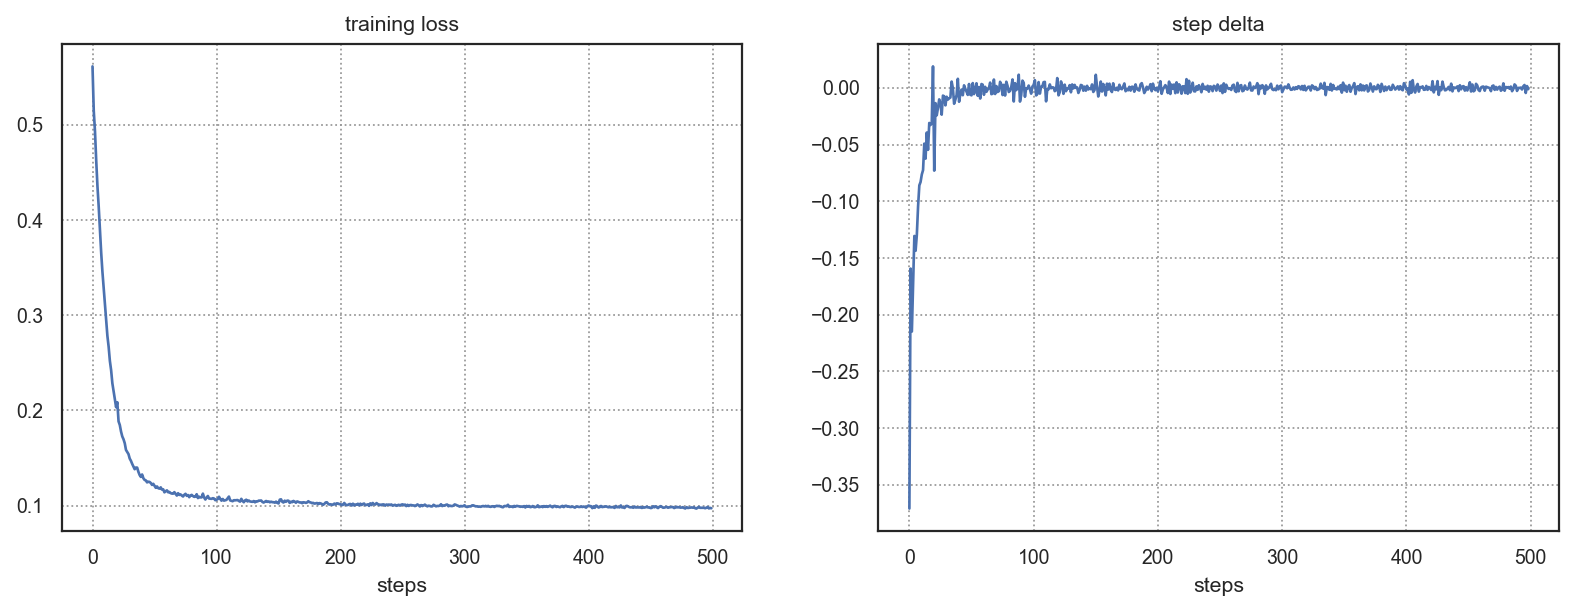

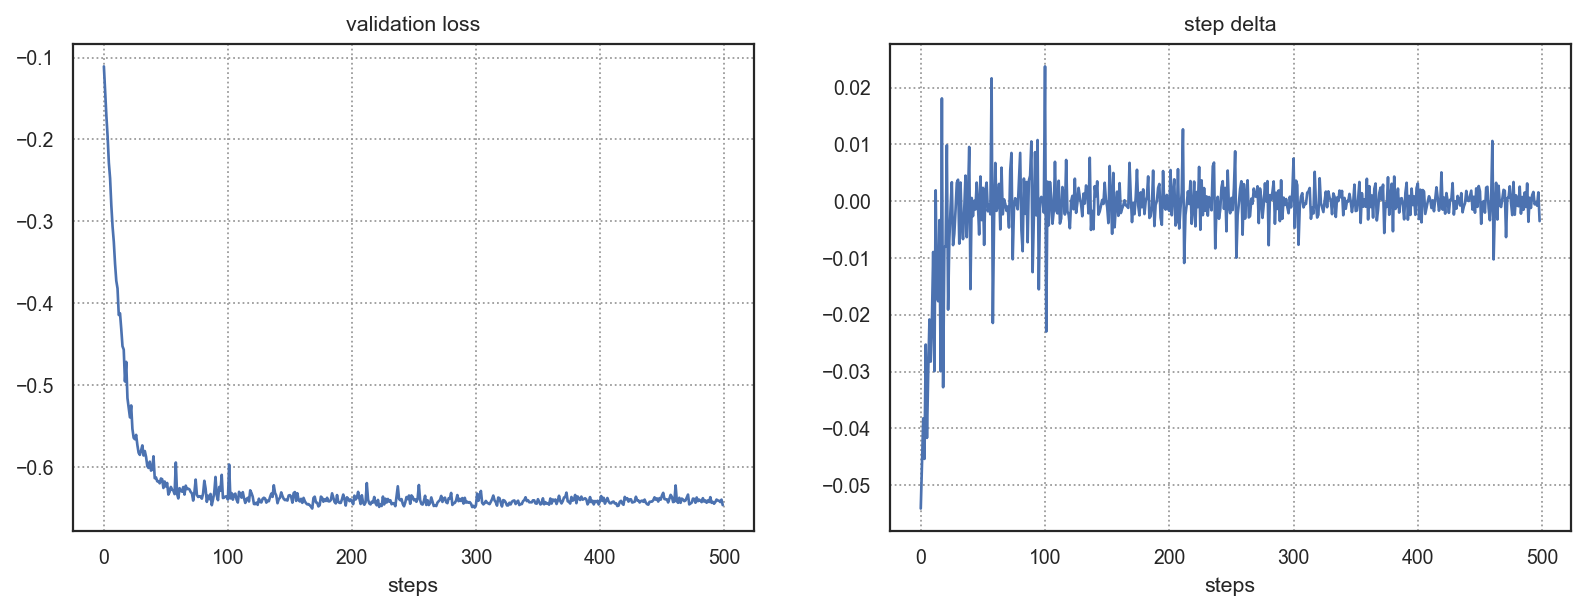

2025-06-05 17:12:47,398 | INFO : Saving echidna model with run_id 20250605-171247.


In [11]:
config = ec.tl.EchidnaConfig(
    timepoint_label = "condition",
    counts_layer = "counts",
    clusters = "leiden",
    inverse_gamma = False,
    eta_mean_init = 2.,
    patience = -1,
    learning_rate = .1,
    num_timepoints = num_timepoints,
    num_clusters = num_clusters,
    q_corr_init = q_corr_init,
    q_shape_rate_scaler = q_shape_rate_scaler,
    n_steps=500,
)
ec.tl.echidna_train(
     adata
    , wdf
    , config
)

In [12]:
ec.tl.echidna_clones(adata)

2025-06-05 17:12:58,209 | INFO : Dendrogram knee point: 8
2025-06-05 17:12:58,209 | INFO : Dendrogram threshold: 0.4741
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/echidna/tools/eval.py:356: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hier_colors = [color_dict.loc[int(i)][0] for i in adata.obs[cluster_label]]
2025-06-05 17:12:58,312 | INFO : Added `.obs['echidna_clones']`: the learned clones from eta.


In [13]:
ec.tl.echidna_status(adata, threshold=.6)

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/echidna/tools/eval.py:418: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clones_gb = adata.obs.groupby(
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/echidna/tools/eval.py:423: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tp_gb = clones_gb.groupby(
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/echidna/tools/eval.py:461: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

In [11]:
adata = sc.read_h5ad("hmm_all_pt/F12/F12_X.h5")

In [12]:
#adata.uns["echidna"]["config"]["device"]='cpu'

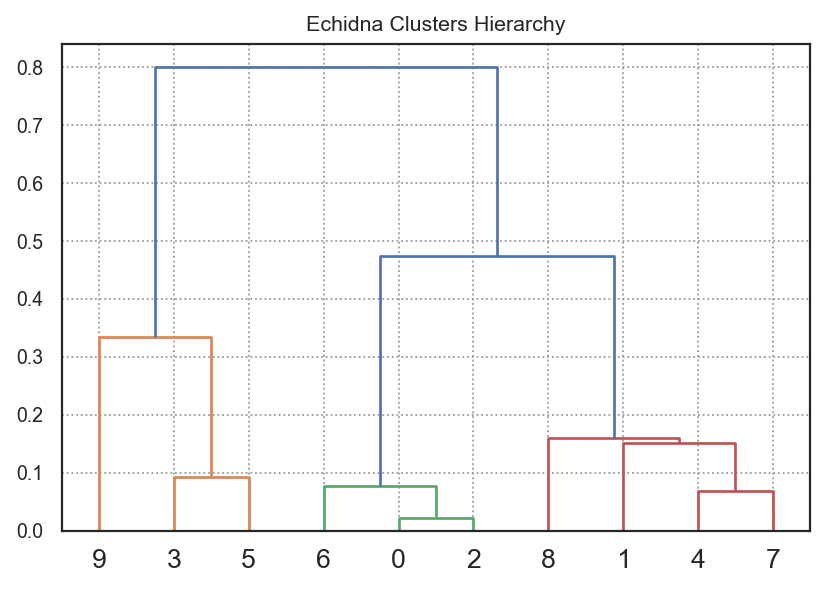

In [14]:
ec.pl.dendrogram(adata)

In [528]:
adata.obs["leiden"] = pd.Categorical(adata.obs["leiden"])

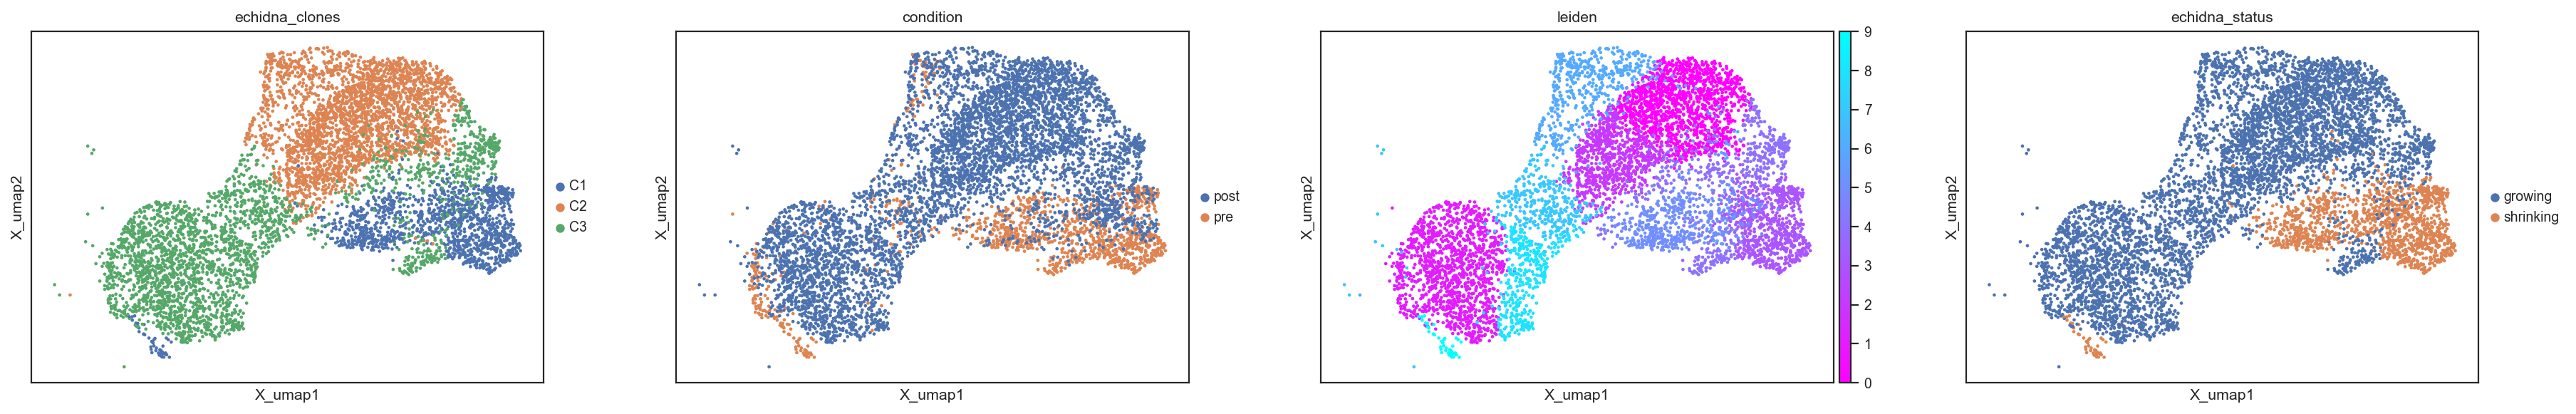

In [15]:
ec.pl.echidna(adata, ["echidna_clones", "condition", "leiden", "echidna_status"])

2025-01-31 17:18:54,502 | INFO : maxp pruned
2025-01-31 17:18:54,503 | INFO : LTSH dropped
2025-01-31 17:18:54,504 | INFO : cmap pruned
2025-01-31 17:18:54,505 | INFO : kern dropped
2025-01-31 17:18:54,507 | INFO : post pruned
2025-01-31 17:18:54,507 | INFO : PCLT dropped
2025-01-31 17:18:54,508 | INFO : JSTF dropped
2025-01-31 17:18:54,508 | INFO : DSIG dropped
2025-01-31 17:18:54,510 | INFO : GPOS pruned
2025-01-31 17:18:54,511 | INFO : GSUB pruned
2025-01-31 17:18:54,513 | INFO : glyf pruned
2025-01-31 17:18:54,515 | INFO : Added gid0 to subset
2025-01-31 17:18:54,515 | INFO : Added first four glyphs to subset
2025-01-31 17:18:54,515 | INFO : Closing glyph list over 'GSUB': 35 glyphs before
2025-01-31 17:18:54,515 | INFO : Glyph names: ['.notdef', '.null', 'C', 'X', 'a', 'c', 'd', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'w', 'zero']
2025-01

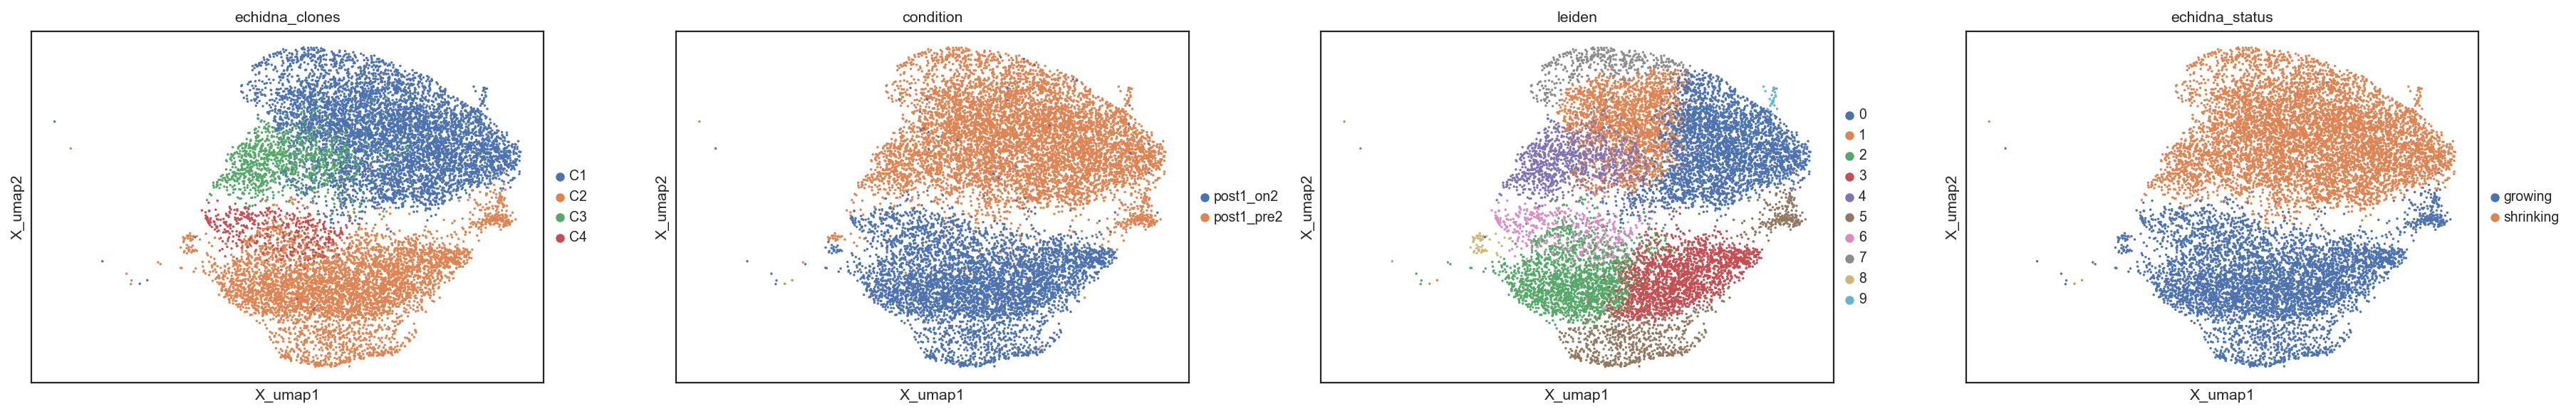

In [10]:
ec.pl.echidna(adata, ["echidna_clones", "condition", "leiden", "echidna_status"])
plt.savefig("hmm_all_pt/"+"F03"+"_umaps.pdf", dpi=300)

In [554]:
ec.tl.echi_cnv(adata, plot_gmm=True, n_gmm_components=7)

2025-01-03 19:01:24,277 | INFO : `genome` not set, defaulting to hg38wgEncodeGencodeCompV46.


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/echidna/plot/post.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticks = [(chrom_counts[i-1] + chrom_counts[i])/2 if i != 0 else chrom_counts[i]/2 for i in range(len(chrom_counts))]


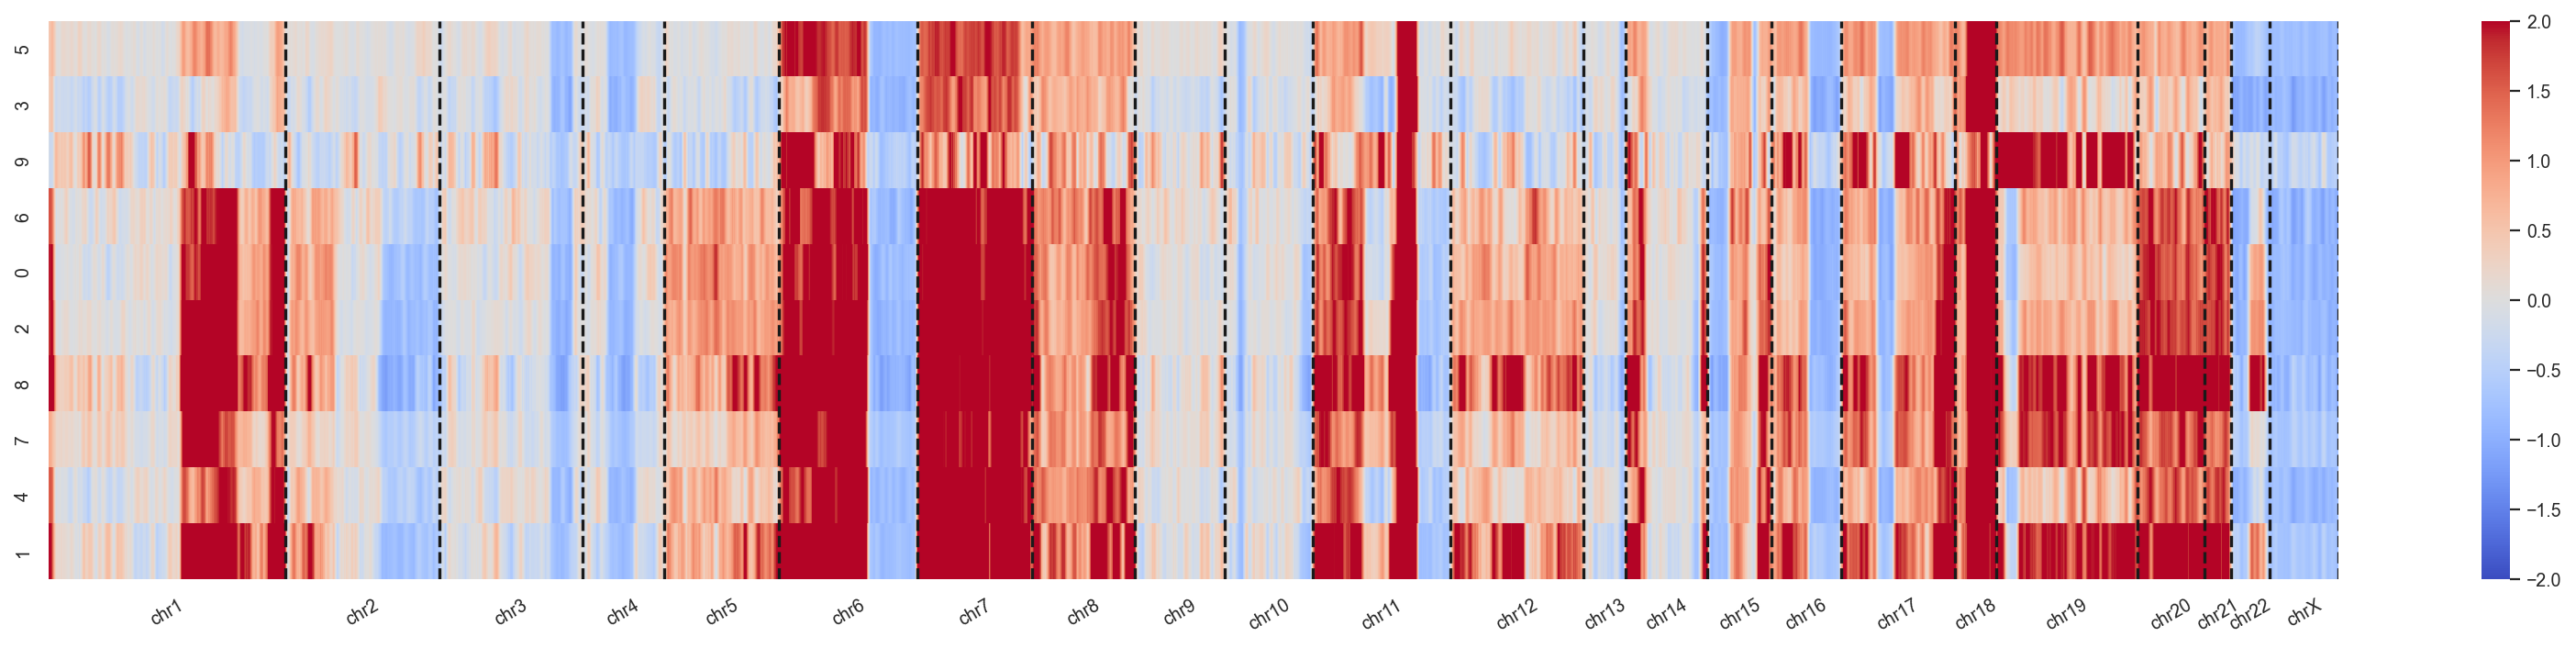

In [14]:
ec.pl.plot_eta(adata)
#plt.savefig("hmm_all_pt/"+pt+"_eta.pdf",dpi=300)

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/echidna/plot/post.py:122: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticks = [(chrom_counts[i-1] + chrom_counts[i])/2 if i != 0 else chrom_counts[i]/2 for i in range(len(chrom_counts))]


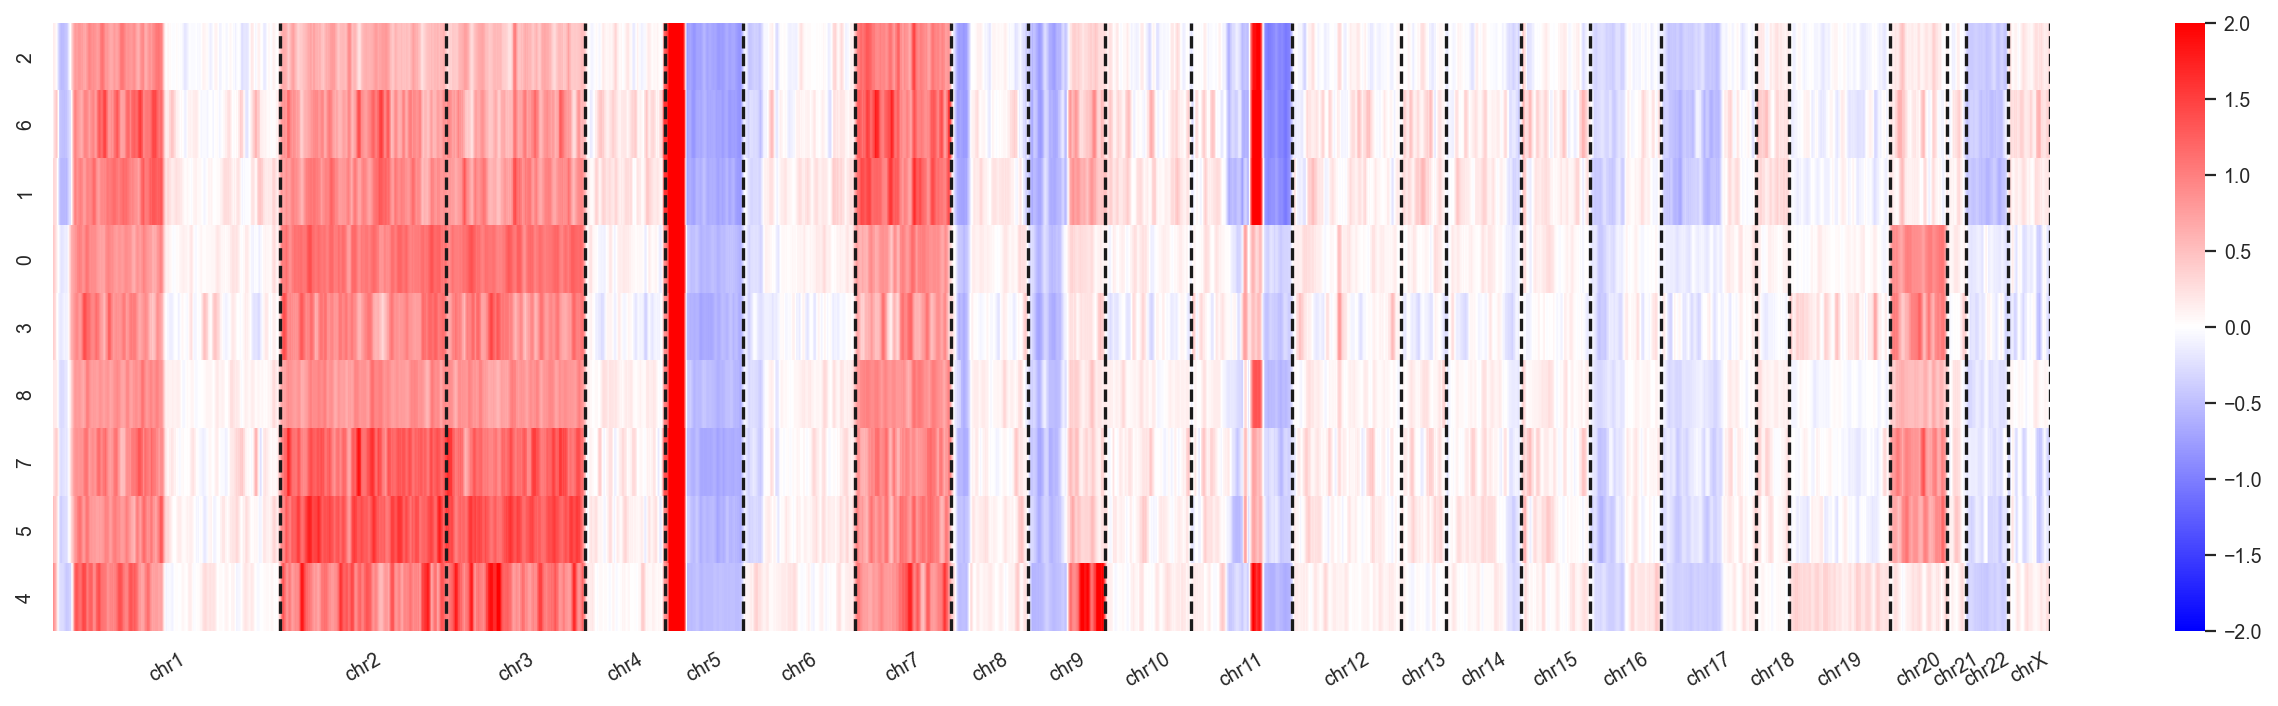

In [5]:
ec.pl.plot_cnv(adata)
#plt.savefig("hmm_all_pt/"+pt+"_hmm.pdf",dpi=300)

In [7]:
obs = adata.obs
cl_status = pd.DataFrame()
for cl in np.unique(adata.obs["leiden"]):
    tmp = pd.DataFrame(np.unique(obs[obs["leiden"]==cl]["echidna_status"], return_counts=True))
    cl_status[cl] = [tmp.T.sort_values(by=1, ascending=False).iloc[0][0]]

In [8]:
cl_status = cl_status.T

In [15]:
cl_status.columns = ["F02"]
pt = "F02"

In [13]:
#cl_status.to_csv("hmm_all_pt/"+pt+"_status.csv")

In [16]:
eta = ec.tl.cnv_results(adata)

cnvs = eta[[i for i in eta.columns if "clone" in i and "states" not in i]]

states = eta[[i for i in eta.columns if "states" in i]]

cnvs.columns = [i.split("_")[2] for i in cnvs.columns]
cnvs.columns = [pt+"_"+i for i in cnvs.columns]

states.columns = [i.split("_")[3] for i in states.columns]
states.columns = [pt+"_"+i for i in states.columns]

In [19]:
cnvs.to_csv("hmm_all_pt/"+pt+"_delta_eta.csv")
#states.to_csv("hmm_all_pt/"+pt+"_states.csv")

In [540]:
ec.tl.gene_dosage_effect(adata)

2025-01-03 00:34:47,418 | INFO : Added `.uns['echidna']['save_data']['gene_dosage']` : Path to gene dosage effect results.


In [541]:
import torch
gene_dosage = torch.load(adata.uns['echidna']['save_data']['gene_dosage']).detach().numpy()

In [542]:
obs = adata.obs
time_map = pd.DataFrame()
for cl in np.unique(adata.obs["leiden"]):
    tmp = pd.DataFrame(np.unique(obs[obs["leiden"]==cl]["timepoint"], return_counts=True))
    time_map[cl] = [tmp.T.sort_values(by=1, ascending=False).iloc[0][0]]

In [543]:
order = ["pre", "on", "on1", "on2", "post", "post1", "post1_pre2", "post1_on2", "post2"]

In [544]:
sort_time = [i for i in order if i in list(time_map.loc[0])]

In [545]:
sort_time

['pre', 'post']

In [546]:
gde = pd.DataFrame()
for cl in range(gene_dosage.shape[2]):
    gde[cl] = gene_dosage[:,sort_time.index(time_map[cl][0]),cl]
gde.index = adata.var_names

In [547]:
gde.to_csv("hmm_all_pt/"+pt+"_gde.csv")

In [548]:
adata.write_h5ad("hmm_all_pt/"+pt+"_X.h5")